## 📊 About the Dataset

This dataset, **Student Performance**, is designed to explore the factors that influence academic success. It includes **10,000 synthetic student records**, each with several predictor variables and a target variable called the *Performance Index*.

### 🔍 Dataset Description

Each student record contains the following variables:

- **Hours Studied**: Total number of hours the student studied.
- **Previous Scores**: Scores from previous academic tests.
- **Extracurricular Activities**: Participation in extracurricular activities (`Yes` or `No`).
- **Sleep Hours**: Average daily hours of sleep.
- **Sample Question Papers Practiced**: Number of sample question papers completed.

### 🎯 Target Variable

- **Performance Index**: A rounded integer score ranging from **10 to 100**, representing the student’s overall academic performance. Higher values indicate better performance.


> **Note:** This dataset is **synthetic** and created solely for illustrative purposes. The relationships within the data may not accurately represent real-world trends

### Source

https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression



In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


## Initial Exploratory Analysis

In [3]:
# Read the data into a pandas DataFrame
students_df = pd.read_csv('Student_Performance.csv')

#View the first few rows of the DataFrame
students_df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [4]:
# How many rows and columns are in the DataFrame?
print(f"The DataFrame has {students_df.shape[0]} rows and {students_df.shape[1]} columns.")

The DataFrame has 10000 rows and 6 columns.


In [5]:
# Dataframe information
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
#DataFrame description
students_df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
#Check for empty / null values
print(students_df.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [8]:
# What unique values does it have for Extracurricular activities?
print(students_df['Extracurricular Activities'].unique())

['Yes' 'No']


## Data Analysis

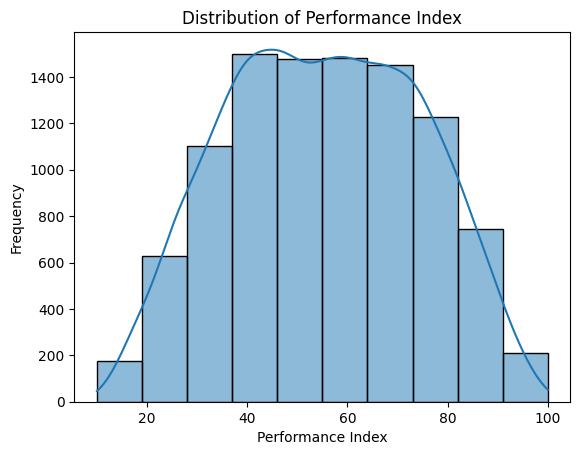

In [9]:
# What is the distribution of the target variable? (Performance Index)
sns.histplot(students_df['Performance Index'], bins=10, kde=True)
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

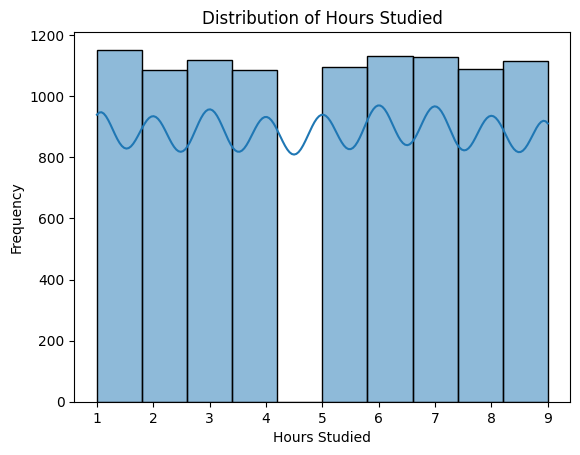

In [10]:
# Explore distribution of other features
sns.histplot(students_df['Hours Studied'], bins=10, kde=True)
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency') 
plt.show()


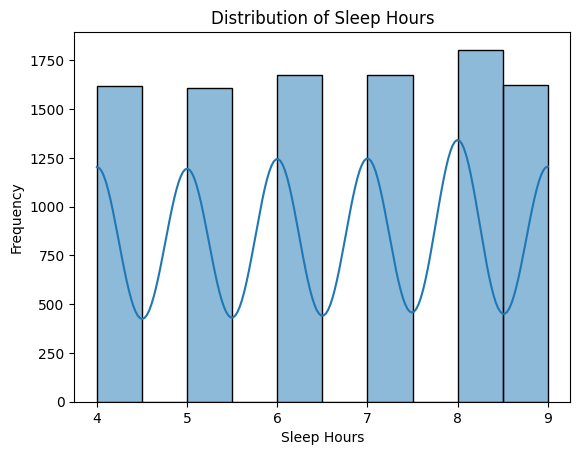

In [11]:
# Explore distribution of other features
sns.histplot(students_df['Sleep Hours'], bins=10, kde=True)
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency') 
plt.show()

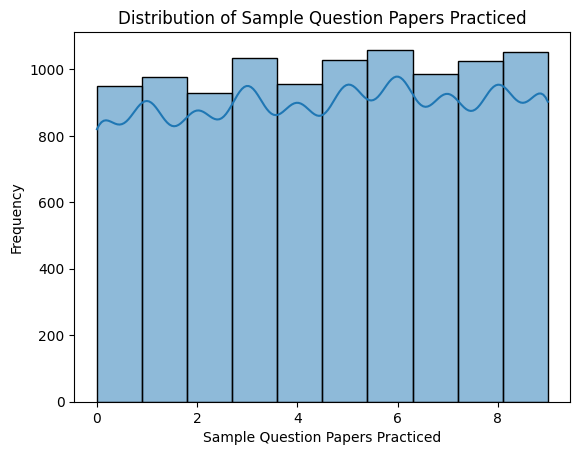

In [12]:
# Explore distribution of other features
sns.histplot(students_df['Sample Question Papers Practiced'], bins=10, kde=True)
plt.title('Distribution of Sample Question Papers Practiced')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Frequency') 
plt.show()

<Axes: >

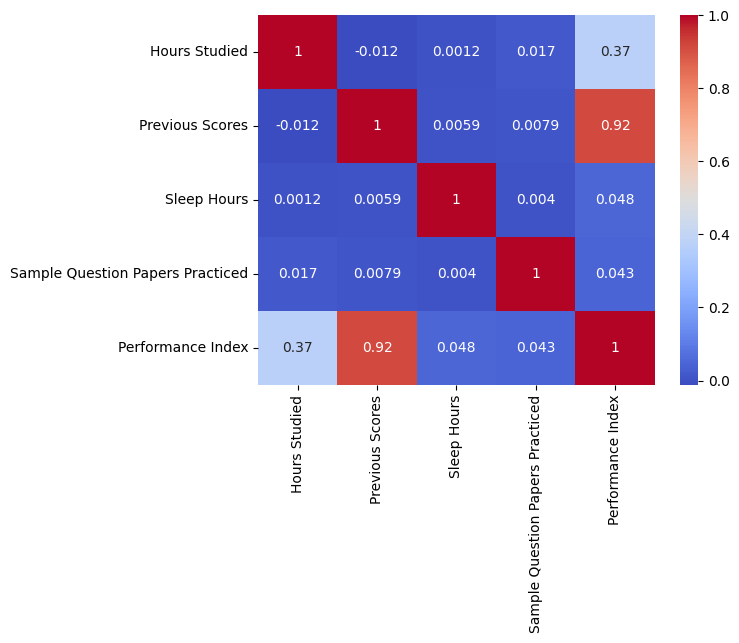

In [13]:
#Correlation matrix
sns.heatmap(students_df.corr(numeric_only=True), annot=True, cmap='coolwarm')

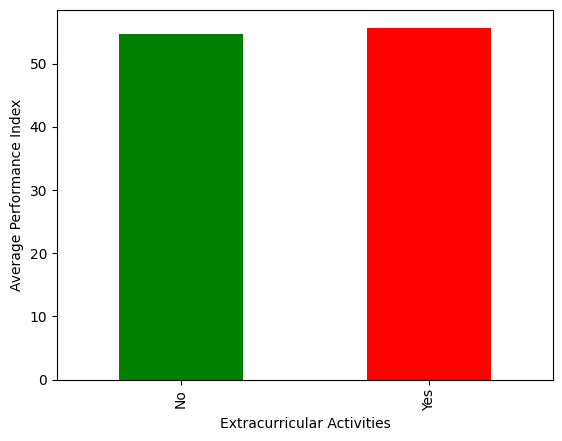

In [14]:
# Customize bar colors and add y-label
students_df.groupby('Extracurricular Activities')['Performance Index'].mean().plot(
    kind='bar', 
    color=['green' if activity == 'Yes' else 'red' for activity in students_df['Extracurricular Activities'].unique()]
)
plt.ylabel('Average Performance Index')
plt.show()

## Check for outliers

In [15]:
#Define numeric columns
numeric_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

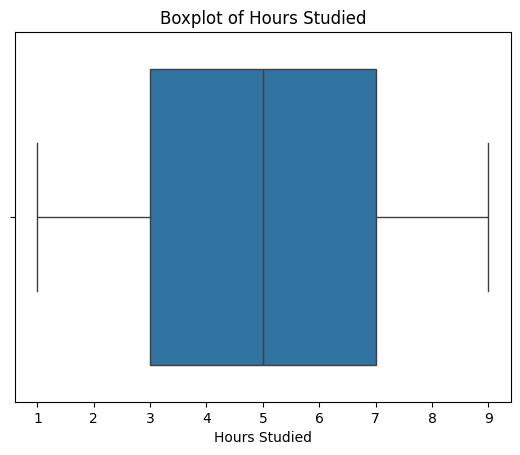

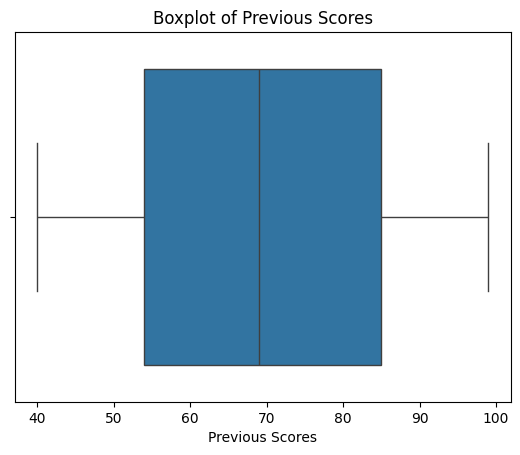

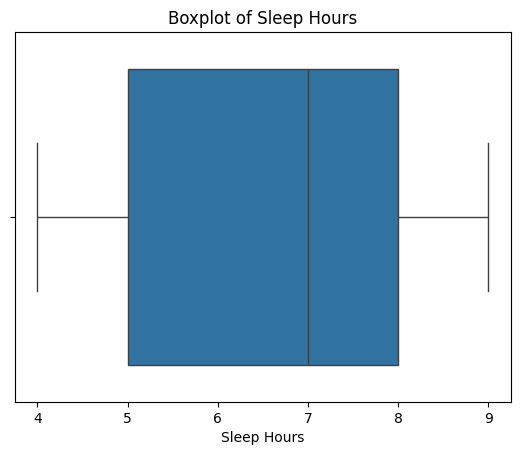

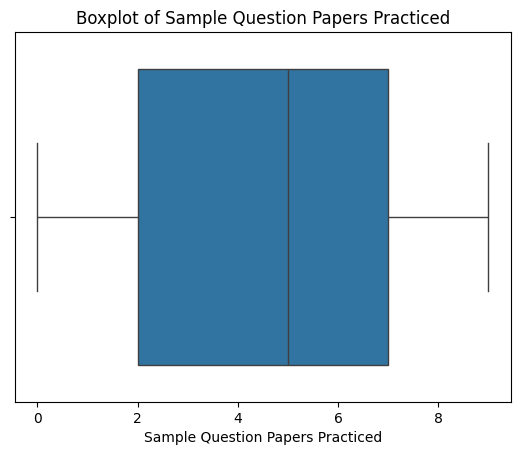

In [16]:
# Loop through each numeric column
for col in numeric_cols:
    data = students_df[col].dropna()

    # Calculate Q1, Q3, and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Plot boxplot
    sns.boxplot(x=data, showfliers=True)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    # Plot and label outliers
    for i, val in enumerate(outliers):
        plt.scatter(val, 0, color='red', zorder=3)
        plt.text(val, 0.1, f'{val:.2f}', ha='center', va='bottom', fontsize=8, rotation=45)

    plt.show()

In [17]:
#Print any outliers found in the dataset
for col in numeric_cols:
    data = students_df[col].dropna()

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    if not outliers.empty:
        print(f'\n📌 Outliers in "{col}":')
        print(outliers)
    else:
        print(f'\n✅ No outliers found in "{col}".')



✅ No outliers found in "Hours Studied".

✅ No outliers found in "Previous Scores".

✅ No outliers found in "Sleep Hours".

✅ No outliers found in "Sample Question Papers Practiced".


## Linear Regression Models

In [18]:
# Encode categorical variable 'Extracurricular Activities'
le = LabelEncoder()
students_df['Extracurricular Activities Encoded'] = le.fit_transform(students_df['Extracurricular Activities'])
students_df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities Encoded
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0
5,3,78,No,9,6,61.0,0
6,7,73,Yes,5,6,63.0,1
7,8,45,Yes,4,6,42.0,1
8,5,77,No,8,2,61.0,0
9,4,89,No,4,0,69.0,0


In [19]:
# Split the data into features and target variable
# X = features
X = students_df.drop(columns=['Performance Index', 'Extracurricular Activities'])
# y = target variable (Performance Index)
y = students_df['Performance Index']


In [20]:
# Train-test split: split the data into training and testing sets to evaluate the model's performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (8000, 5), (8000,)
Testing set shape: (2000, 5), (2000,)


In [21]:
# Train a Linear Regression Model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)


LinearRegression()

In [22]:
# Make predictions on the test set
y_pred = model_1.predict(X_test)

In [23]:
#Evaluate the model's performance using R-squared and Mean Absolute Error (MAE)

#MAE will explain by how much the predicted values deviate from the actual values on average (number of performance index points).
#MAE close to 0 means that the model's predictions are very close to the actual values.
mae = mean_absolute_error(y_test, y_pred)

#R² close to 1 means that most of the variation in the target variable is explained by our model.
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error: 1.61
R-squared: 0.99


                                    Coefficient
Hours Studied                          2.852484
Previous Scores                        1.016988
Extracurricular Activities Encoded     0.608617
Sleep Hours                            0.476941
Sample Question Papers Practiced       0.191831


<Figure size 1000x600 with 0 Axes>

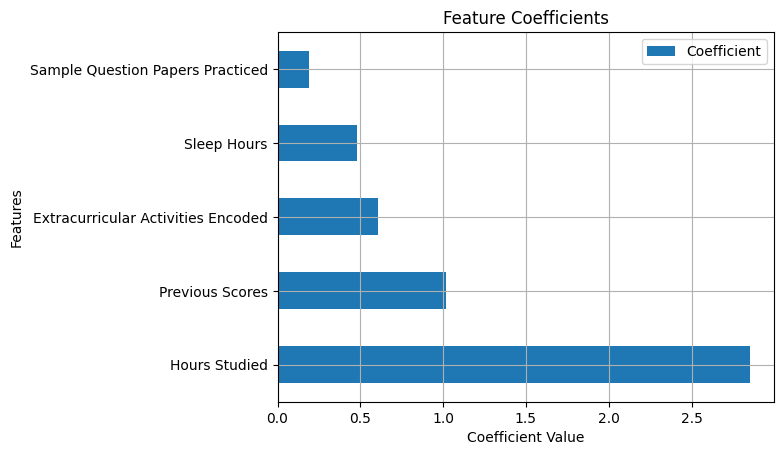

In [24]:
# Check the coefficients of the model - how much each feature contributes to the prediction
coefficients = pd.DataFrame(model_1.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)
# Plot the coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh')
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid()
plt.show()

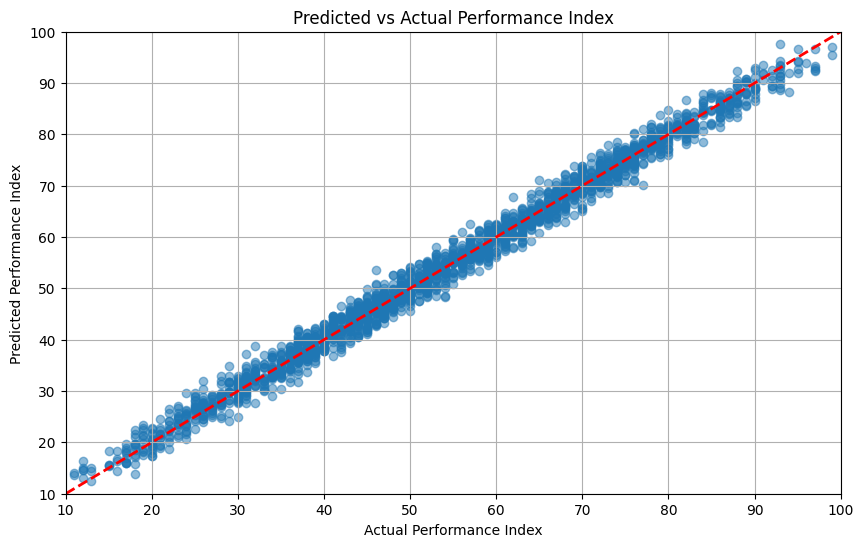

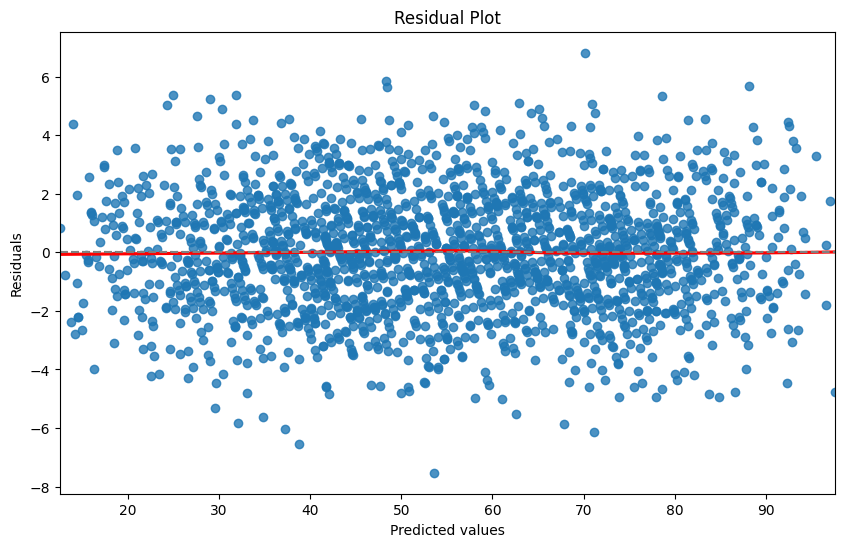

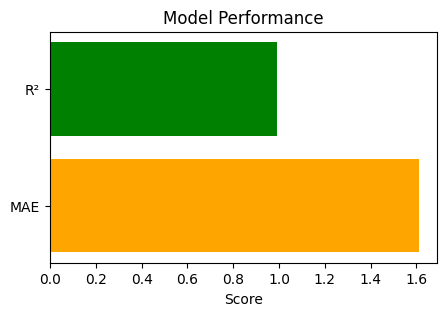

In [25]:
#Plot the model performance

# Actual vs Predicted
# Points should lie close to the diagonal red line (perfect prediction line)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Performance Index')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.grid()
plt.show()


# Residual Plot
# Should see no obvious patterns in the residuals (random scatter)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# MAE and R² Bar Chart
# MAE should be low, and R² should be high (close to 1)
plt.figure(figsize=(5,3))
metrics = {'MAE': mae, 'R²': r2}
plt.barh(list(metrics.keys()), list(metrics.values()), color=['orange', 'green'])
plt.xlabel('Score')
plt.title('Model Performance')
plt.show()

In [26]:
# Combine predictions into a DataFrame for export
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Optionally add features for context (use reset_index to align rows if needed)
X_test_reset = X_test.reset_index(drop=True)
results_df = pd.concat([X_test_reset, results_df], axis=1)

results_df.head(10)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities Encoded,Actual,Predicted
0,5,69,8,2,0,51.0,54.711854
1,2,46,4,8,1,20.0,22.615513
2,7,56,7,5,1,46.0,47.903145
3,6,42,8,5,1,28.0,31.289767
4,7,53,4,6,0,41.0,43.004570
5,9,63,4,7,0,59.0,59.071252
6,6,59,4,1,1,48.0,45.903475
7,6,96,9,7,0,87.0,86.459118
8,7,46,7,8,0,37.0,37.700140
9,7,79,9,4,1,73.0,72.055925


In [28]:
results_df.to_csv('predictions.csv', index=False)